In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import zipfile

In [2]:
with zipfile.ZipFile('/content/drive/MyDrive/spaceship-titanic.zip') as googledocs:
  print(*googledocs.namelist(), sep='\n')

sample_submission.csv
test.csv
train.csv


In [3]:
with zipfile.ZipFile('/content/drive/MyDrive/spaceship-titanic.zip') as treino:
  with treino.open('train.csv') as tr:
    train = pd.read_csv(tr)

In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
with zipfile.ZipFile('/content/drive/MyDrive/spaceship-titanic.zip') as teste:
  with teste.open('test.csv') as tes:
    test = pd.read_csv(tes)

In [6]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [7]:
train.shape, test.shape

((8693, 14), (4277, 13))

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [10]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [11]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [12]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [13]:
passengerId = test['PassengerId']
space_titanic_df = train.append(test, ignore_index = True)

In [14]:
passengerId

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [15]:
space_titanic_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [16]:
train_index = len(train)
train_index

8693

In [17]:
test_index = len(space_titanic_df) - len(test)
test_index

8693

In [18]:
space_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.4+ MB


In [19]:
#novo dataframe que receberá as features
space_df = pd.DataFrame()

# Função Resumo

In [20]:
def space_funcao(dados, column, count=True):
  print(f'Quantidade de valores únicos: {dados[column].nunique()}')
  print(f'Quais são esses valores únicos: {dados[column].unique()}')
  print(f'Quantidade de valores nulos: {dados[column].isnull().sum()}')
  print(f'Quantidade de valores por categoria: {dados[column].value_counts()}')

  if count == True:
    sns.countplot(data = dados, x = column, hue='Transported')
  else:
    sns.displot(dados[column], hue='Transported')

# Transformando em números: CryoSleep, Destination e VIP

In [21]:
space_titanic_df['HomePlanet'] = space_titanic_df['HomePlanet'].apply(lambda linha: 0 if linha == 'Earth' else (1 if linha == 'Europa' else (2 if linha == 'Mars' else 3)))
space_titanic_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,1,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,1,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,0,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,0,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,0,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,2,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,1,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [22]:
space_titanic_df['Destination'] = space_titanic_df['Destination'].apply(lambda linha: 0 if linha == 'TRAPPIST-1e' else (1 if linha == 'PSO J318.5-22' else(2 if linha == '55 Cancri e' else 3)))
space_titanic_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,False,B/0/P,0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0,False,F/0/S,0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,1,False,A/0/S,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,1,False,A/0/S,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,0,False,F/1/S,0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,0,True,G/1496/S,0,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,0,False,NaN,0,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,2,True,D/296/P,2,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,1,False,D/297/P,3,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [23]:
space_titanic_df['VIP'] = space_titanic_df['VIP'].apply(lambda linha: 0 if linha == False else (1 if linha == True else 2))

In [24]:
space_titanic_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,False,B/0/P,0,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0,False,F/0/S,0,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,1,False,A/0/S,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,1,False,A/0/S,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,0,False,F/1/S,0,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,0,True,G/1496/S,0,34.0,0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,0,False,NaN,0,42.0,0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,2,True,D/296/P,2,NaN,0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,1,False,D/297/P,3,NaN,0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [25]:
space_titanic_df['CryoSleep'] = space_titanic_df['CryoSleep'].apply(lambda linha: 0 if linha == False else (1 if linha == True else 2))
space_titanic_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,0,B/0/P,0,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0,0,F/0/S,0,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,1,0,A/0/S,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,1,0,A/0/S,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,0,0,F/1/S,0,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,0,1,G/1496/S,0,34.0,0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,0,0,NaN,0,42.0,0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,2,1,D/296/P,2,NaN,0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,1,0,D/297/P,3,NaN,0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


# HomePlanet

In [26]:
# 0 - Earth
# 1 -Europa
# 2 - Mars
# 3 - nulos - NaN

In [27]:
space_titanic_df['HomePlanet']

0        1
1        0
2        1
3        1
4        0
        ..
12965    0
12966    0
12967    2
12968    1
12969    0
Name: HomePlanet, Length: 12970, dtype: int64

In [28]:
space_titanic_df['HomePlanet'].unique()

array([1, 0, 2, 3])

In [29]:
space_titanic_df['HomePlanet'].nunique()

4

In [30]:
space_titanic_df['HomePlanet'].isnull().sum()

0

In [31]:
space_titanic_df['HomePlanet'].value_counts()

0    6865
1    3133
2    2684
3     288
Name: HomePlanet, dtype: int64

Quantidade de valores únicos: 4
Quais são esses valores únicos: [1 0 2 3]
Quantidade de valores nulos: 0
Quantidade de valores por categoria: 0    6865
1    3133
2    2684
3     288
Name: HomePlanet, dtype: int64


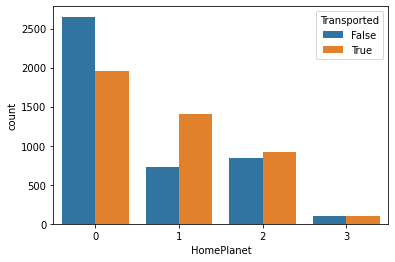

In [32]:
#invocando a função acima:
space_funcao(space_titanic_df, 'HomePlanet')

In [33]:
#para "HomePlanet", existem 3 valores: Europa, Terra e Marte, fora os nulos.
#Nulos esses, que contabilizam 288 entradas.
#por categoria terra possui mais apareições:
print(6865 / (6865 + 3133 + 2684))
#Lua europa vem em segundo:
print(3133 / (6865 + 3133 + 2684))
#E por último, Marte:
print(2684 / (6865 + 3133 + 2684))

0.5413184040372181
0.24704305314619146
0.21163854281659045


In [34]:
#Sobre o gráfico, nota-se que proporcionalmente, a maioria dos passageiros vindo da lua europa foram transportados, enquanto marte, a situação ficou em quase 50%
#Em relação a terra, a maioria não foi transportado mas em números totais, quase 2000 foram transportados pela fenda temporal.

In [35]:
#existe a necessidade de ajustar as linhas que tiveram valores nulos:
space_titanic_df['HomePlanet'].isnull().sum()

0

In [36]:
space_titanic_df[space_titanic_df['HomePlanet'] == 0]['Destination'].mean()

0.504734158776402

In [37]:
space_titanic_df[space_titanic_df['HomePlanet'] == 1]['Destination'].mean()

0.9000957548675391

In [38]:
space_titanic_df[space_titanic_df['HomePlanet'] == 2]['Destination'].mean()

0.31892697466467956

In [39]:
space_titanic_df[space_titanic_df['HomePlanet'] == 3]['Destination'].mean()

0.5104166666666666

In [40]:
space_titanic_df.groupby((space_titanic_df['HomePlanet'] == 3) & (space_titanic_df['Destination'] == 0))['Destination'].describe()

,count,mean,std,min,25%,50%,75%,max
False,12764.0,0.570981,0.887493,0.0,0.0,0.0,1.0,3.0
True,206.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [41]:
space_titanic_df.groupby((space_titanic_df['HomePlanet'] == 3) & (space_titanic_df['Destination'] == 1))['Destination'].describe()

,count,mean,std,min,25%,50%,75%,max
False,12947.0,0.561134,0.883897,0.0,0.0,0.0,1.0,3.0
True,23.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [42]:
space_titanic_df.groupby((space_titanic_df['HomePlanet'] == 3) & (space_titanic_df['Destination'] == 2))['Destination'].describe()

,count,mean,std,min,25%,50%,75%,max
False,12917.0,0.556011,0.880289,0.0,0.0,0.0,1.0,3.0
True,53.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


In [43]:
space_titanic_df[space_titanic_df['HomePlanet'] == 0]['Destination'].value_counts()

0    4672
1    1065
2     984
3     144
Name: Destination, dtype: int64

In [44]:
space_titanic_df[space_titanic_df['HomePlanet'] == 1]['Destination'].value_counts()

0    1737
2    1310
3      57
1      29
Name: Destination, dtype: int64

In [45]:
space_titanic_df[space_titanic_df['HomePlanet'] == 2]['Destination'].value_counts()

0    2256
2     294
3      67
1      67
Name: Destination, dtype: int64

In [46]:
space_titanic_df[space_titanic_df['HomePlanet'] == 3]['Destination'].value_counts()

0    206
2     53
1     23
3      6
Name: Destination, dtype: int64

In [47]:
space_titanic_df['HomePlanet'] = space_titanic_df['HomePlanet'].apply(lambda linha: 0 if linha == 3 else linha)

In [48]:
space_titanic_df['HomePlanet'].value_counts()

0    7153
1    3133
2    2684
Name: HomePlanet, dtype: int64

# CryoSleep

In [49]:
# 0 é nao
# 1 é sim
# 2 é nulo

Quantidade de valores únicos: 3
Quais são esses valores únicos: [0 1 2]
Quantidade de valores nulos: 0
Quantidade de valores por categoria: 0    8079
1    4581
2     310
Name: CryoSleep, dtype: int64


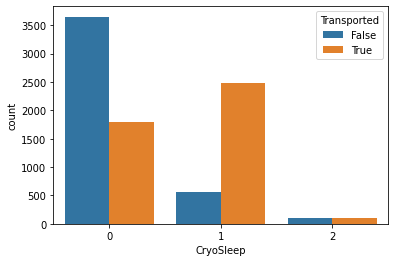

In [50]:
space_funcao(space_titanic_df, 'CryoSleep')

In [51]:
#olhando unicamente o gráfico, nota-se que o mesmo é um bom preditor pois que estava em sono criogênico foi transportado em maior número

In [52]:
#nas estatisticas, existem apenas dois resultados, True e False, com 310 valores nulos.

In [53]:
space_titanic_df[space_titanic_df['CryoSleep'] == 0]['VIP'].value_counts()

0    7657
1     239
2     183
Name: VIP, dtype: int64

In [54]:
space_titanic_df[space_titanic_df['CryoSleep'] == 1]['VIP'].value_counts()

0    4449
2     104
1      28
Name: VIP, dtype: int64

In [55]:
space_titanic_df[space_titanic_df['CryoSleep'] == 2]['VIP'].value_counts()

0    295
2      9
1      6
Name: VIP, dtype: int64

In [56]:
space_titanic_df[space_titanic_df['CryoSleep'] == 0]['HomePlanet'].value_counts()

0    4812
1    1678
2    1589
Name: HomePlanet, dtype: int64

In [57]:
space_titanic_df[space_titanic_df['CryoSleep'] == 1]['HomePlanet'].value_counts()

0    2173
1    1374
2    1034
Name: HomePlanet, dtype: int64

In [58]:
space_titanic_df[space_titanic_df['CryoSleep'] == 2]['HomePlanet'].value_counts()

0    168
1     81
2     61
Name: HomePlanet, dtype: int64

In [59]:
space_titanic_df['CryoSleep'] = space_titanic_df['CryoSleep'].apply(lambda linha: 0 if linha == 2 else linha)

In [60]:
space_titanic_df['CryoSleep'].value_counts()

0    8389
1    4581
Name: CryoSleep, dtype: int64

In [61]:
space_titanic_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,0,B/0/P,0,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0,0,F/0/S,0,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,1,0,A/0/S,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,1,0,A/0/S,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,0,0,F/1/S,0,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [62]:
'''deixa errado for c in space_titanic_df.index:
  if pd.isnull(space_titanic_df['Age'][c]):
    if titanic_df['Pclass'][c] == 1:
      titanic_df['Age'][c] = round(titanic_df[titanic_df['Pclass'] == 1]['Age'].mean(), 0) #esse zero ao final é o round
    elif titanic_df['Pclass'][c] == 2:
      titanic_df['Age'][c] = round(titanic_df[titanic_df['Pclass'] == 2]['Age'].mean(), 0)
    elif titanic_df['Pclass'][c] == 3:
      titanic_df['Age'][c] = round(titanic_df[titanic_df['Pclass'] == 3]['Age'].mean(), 0)
  else:
    continue'''

"deixa errado for c in space_titanic_df.index:\n  if pd.isnull(space_titanic_df['Age'][c]):\n    if titanic_df['Pclass'][c] == 1:\n      titanic_df['Age'][c] = round(titanic_df[titanic_df['Pclass'] == 1]['Age'].mean(), 0) #esse zero ao final é o round\n    elif titanic_df['Pclass'][c] == 2:\n      titanic_df['Age'][c] = round(titanic_df[titanic_df['Pclass'] == 2]['Age'].mean(), 0)\n    elif titanic_df['Pclass'][c] == 3:\n      titanic_df['Age'][c] = round(titanic_df[titanic_df['Pclass'] == 3]['Age'].mean(), 0)\n  else:\n    continue"

# VIP

Quantidade de valores únicos: 3
Quais são esses valores únicos: [0 1 2]
Quantidade de valores nulos: 0
Quantidade de valores por categoria: 0    12401
2      296
1      273
Name: VIP, dtype: int64


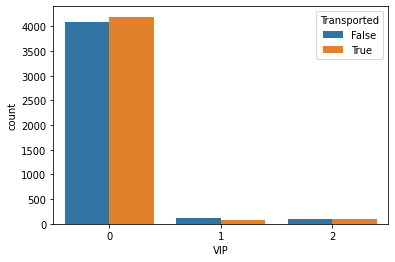

In [63]:
space_funcao(space_titanic_df, 'VIP')

In [64]:
space_titanic_df['VIP'].value_counts()

0    12401
2      296
1      273
Name: VIP, dtype: int64

In [65]:
space_titanic_df[space_titanic_df['VIP'] == 0]['HomePlanet'].value_counts()

0    6985
1    2883
2    2533
Name: HomePlanet, dtype: int64

In [66]:
space_titanic_df[space_titanic_df['VIP'] == 1]['HomePlanet'].value_counts()

1    177
2     90
0      6
Name: HomePlanet, dtype: int64

In [67]:
space_titanic_df[space_titanic_df['VIP'] == 2]['HomePlanet'].value_counts()

0    162
1     73
2     61
Name: HomePlanet, dtype: int64

In [68]:
space_titanic_df[space_titanic_df['VIP'] == 0]['Destination'].value_counts()

0    8510
2    2491
1    1136
3     264
Name: Destination, dtype: int64

In [69]:
space_titanic_df[space_titanic_df['VIP'] == 1]['Destination'].value_counts()

0    163
2     85
1     22
3      3
Name: Destination, dtype: int64

In [70]:
space_titanic_df[space_titanic_df['VIP'] == 2]['Destination'].value_counts()

0    198
2     65
1     26
3      7
Name: Destination, dtype: int64

In [71]:
space_titanic_df['VIP'] = space_titanic_df['VIP'].apply(lambda linha: 0 if linha == 2 else linha)

In [72]:
space_titanic_df['VIP'].value_counts()

0    12697
1      273
Name: VIP, dtype: int64

# Cabin

In [73]:
#space_funcao(space_titanic_df, 'Cabin')
space_titanic_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,0,B/0/P,0,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0,0,F/0/S,0,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,1,0,A/0/S,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,1,0,A/0/S,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,0,0,F/1/S,0,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,0,1,G/1496/S,0,34.0,0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,0,0,NaN,0,42.0,0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,2,1,D/296/P,2,NaN,0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,1,0,D/297/P,3,NaN,0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [74]:
space_titanic_df['Cabin'].isnull().sum()

299

In [75]:
space_titanic_df['Cabin']

0           B/0/P
1           F/0/S
2           A/0/S
3           A/0/S
4           F/1/S
           ...   
12965    G/1496/S
12966         NaN
12967     D/296/P
12968     D/297/P
12969    G/1498/S
Name: Cabin, Length: 12970, dtype: object

In [76]:
#a informação cabine, tem o o quarto, deck e lado do navio, ideia é separar cada um atraves do split
space_titanic_df[['Deck', 'Num', 'Side']] = space_titanic_df['Cabin'].str.split('/', expand = True)

In [77]:
space_titanic_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,1,0,B/0/P,0,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,0,0,F/0/S,0,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,1,0,A/0/S,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,1,0,A/0/S,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,0,0,F/1/S,0,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,0,1,G/1496/S,0,34.0,0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,G,1496,S
12966,9269_01,0,0,NaN,0,42.0,0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,NaN,NaN,NaN
12967,9271_01,2,1,D/296/P,2,NaN,0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,D,296,P
12968,9273_01,1,0,D/297/P,3,NaN,0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,D,297,P


In [78]:
space_titanic_df.drop('Cabin', axis=1, inplace = True)

In [79]:
space_titanic_df[['PassengerGroup', 'PassengerId']] = space_titanic_df['PassengerId'].str.split('_', expand = True)

In [80]:
space_titanic_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,PassengerGroup
0,01,1,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0001
1,01,0,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,0002
2,01,1,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,0003
3,02,1,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,0003
4,01,0,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,02,0,1,0,34.0,0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,G,1496,S,9266
12966,01,0,0,0,42.0,0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,NaN,NaN,NaN,9269
12967,01,2,1,2,NaN,0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,D,296,P,9271
12968,01,1,0,3,NaN,0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,D,297,P,9273


# Deck

Quantidade de valores únicos: 8
Quais são esses valores únicos: ['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T']
Quantidade de valores nulos: 299
Quantidade de valores por categoria: F    4239
G    3781
E    1323
B    1141
C    1102
D     720
A     354
T      11
Name: Deck, dtype: int64


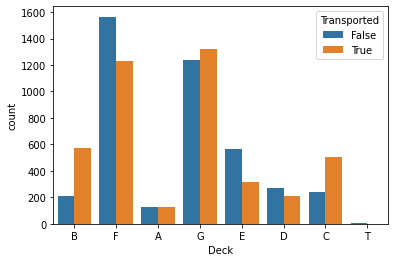

In [81]:
space_funcao(space_titanic_df, 'Deck')

In [82]:
space_titanic_df['Deck'].isnull().sum()

299

In [83]:
space_titanic_df['Deck'].nunique()

8

In [84]:
abacate = space_titanic_df['Deck'].unique()
abacate

array(['B', 'F', 'A', 'G', nan, 'E', 'D', 'C', 'T'], dtype=object)

In [85]:
space_titanic_df['Deck'].value_counts()

F    4239
G    3781
E    1323
B    1141
C    1102
D     720
A     354
T      11
Name: Deck, dtype: int64

In [86]:
space_titanic_df.loc[(space_titanic_df['Deck'] == "G") & (space_titanic_df['Side'] == 'S')]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,PassengerGroup
7,02,0,1,0,28.0,0,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,G,0,S,0006
13,01,0,0,0,48.0,0,719.0,1.0,65.0,0.0,24.0,Reney Baketton,False,G,1,S,0010
32,01,0,0,0,32.0,0,0.0,850.0,81.0,437.0,453.0,Ginia Morsentley,False,G,4,S,0030
50,01,0,0,0,NaN,0,4.0,0.0,2.0,4683.0,0.0,Elaney Hubbarton,False,G,6,S,0052
55,01,0,1,1,36.0,0,0.0,0.0,0.0,0.0,0.0,Warry Ayalazquez,False,G,7,S,0058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12926,01,0,1,0,41.0,0,0.0,0.0,0.0,0.0,0.0,Vana Doughan,NaN,G,1482,S,9191
12957,01,0,0,0,21.0,0,147.0,603.0,20.0,0.0,0.0,Hilip Lambles,NaN,G,1492,S,9249
12962,01,0,1,0,43.0,0,0.0,0.0,0.0,0.0,0.0,Loisey Heney,NaN,G,1495,S,9263
12965,02,0,1,0,34.0,0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,G,1496,S,9266


In [87]:
space_titanic_df.loc[(space_titanic_df['Deck'] == "G") & (space_titanic_df['Side'] == 'P')]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,PassengerGroup
19,01,0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,Lyde Brighttt,True,G,0,P,0017
40,01,0,1,2,30.0,0,0.0,0.0,NaN,0.0,0.0,Jorgie Batthewitt,False,G,1,P,0039
41,01,0,1,0,17.0,0,0.0,0.0,0.0,0.0,0.0,Margia Moodsey,True,G,2,P,0041
43,01,0,1,0,55.0,0,0.0,0.0,0.0,0.0,0.0,Jodye Coopelandez,False,G,3,P,0044
44,02,0,1,2,4.0,0,0.0,0.0,0.0,0.0,0.0,Kayne Coopelandez,True,G,3,P,0044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12948,02,0,1,2,3.0,0,NaN,0.0,0.0,0.0,0.0,Ricke Emenez,NaN,G,1501,P,9238
12949,03,0,1,0,16.0,0,0.0,0.0,0.0,0.0,0.0,Herina Emenez,NaN,G,1501,P,9238
12950,04,0,0,0,26.0,0,882.0,2.0,0.0,0.0,0.0,Marlie Emenez,NaN,G,1501,P,9238
12952,06,0,0,2,0.0,0,0.0,0.0,0.0,0.0,0.0,Blance Garnettiz,NaN,G,1501,P,9238


In [88]:
space_titanic_df['Side'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
12965    False
12966     True
12967    False
12968    False
12969    False
Name: Side, Length: 12970, dtype: bool

In [89]:
space_titanic_df[space_titanic_df['Deck'] == 'F']['HomePlanet'].value_counts()

0    2526
2    1713
Name: HomePlanet, dtype: int64

In [90]:
space_titanic_df[space_titanic_df['Deck'] == 'G']['HomePlanet'].value_counts()

0    3781
Name: HomePlanet, dtype: int64

In [91]:
space_titanic_df[space_titanic_df['Deck'] == 'B']['HomePlanet'].value_counts()

1    1124
0      17
Name: HomePlanet, dtype: int64

In [92]:
for c in space_titanic_df.index:
  if pd.isnull(space_titanic_df['Deck'][c]):
    if space_titanic_df['HomePlanet'][c] == 0:
      space_titanic_df['Deck'][c] = "G" #esse zero ao final é o round
    elif space_titanic_df['HomePlanet'][c] == 1:
      space_titanic_df['Deck'][c] = "B"
    elif space_titanic_df['HomePlanet'][c] == 2:
      space_titanic_df['Deck'][c] = "F"
  else:
    continue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [93]:
space_titanic_df.isnull().sum()

PassengerId          0
HomePlanet           0
CryoSleep            0
Destination          0
Age                270
VIP                  0
RoomService        263
FoodCourt          289
ShoppingMall       306
Spa                284
VRDeck             268
Name               294
Transported       4277
Deck                 0
Num                299
Side               299
PassengerGroup       0
dtype: int64

# Side

In [94]:
space_titanic_df['Side'].isnull().sum()

299

In [95]:
space_titanic_df['Side'].unique()

array(['P', 'S', nan], dtype=object)

In [96]:
space_titanic_df[space_titanic_df['Side'] == "P"]['HomePlanet'].value_counts()

0    3510
1    1450
2    1330
Name: HomePlanet, dtype: int64

In [97]:
space_titanic_df[space_titanic_df['Side'] == "S"]['HomePlanet'].value_counts()

0    3480
1    1604
2    1297
Name: HomePlanet, dtype: int64

In [98]:
for c in space_titanic_df.index:
  if pd.isnull(space_titanic_df['Side'][c]):
    if space_titanic_df['HomePlanet'][c] == 0:
      space_titanic_df['Side'][c] = "P"
    elif space_titanic_df['HomePlanet'][c] == 1:
      space_titanic_df['Side'][c] = "S"
    elif space_titanic_df['HomePlanet'][c] == 2:
      space_titanic_df['Side'][c] = "S"

    else:
      continue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [128]:
space_titanic_df.drop('Num', axis=1, inplace = True)

# Destination

In [99]:
# 0 = TRAPPIST-1e 
# 1 = PSO J318.5-22
# 2 = 55 Cancri e
# 3 = missing

Quantidade de valores únicos: 4
Quais são esses valores únicos: [0 1 2 3]
Quantidade de valores nulos: 0
Quantidade de valores por categoria: 0    8871
2    2641
1    1184
3     274
Name: Destination, dtype: int64


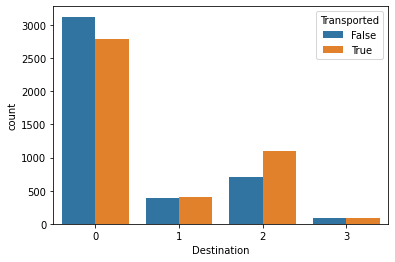

In [100]:
space_funcao(space_titanic_df, 'Destination')

In [101]:
space_titanic_df[space_titanic_df['Destination'] == 0]['HomePlanet'].mean()

0.7044301657084884

In [102]:
space_titanic_df[space_titanic_df['Destination'] == 1]['HomePlanet'].mean()

0.13766891891891891

In [103]:
space_titanic_df[space_titanic_df['Destination'] == 2]['HomePlanet'].mean()

0.7186671715259372

In [104]:
space_titanic_df[space_titanic_df['Destination'] == 3]['HomePlanet'].mean()

0.6970802919708029

In [105]:
space_titanic_df[space_titanic_df['Destination'] == 0]['HomePlanet'].value_counts()

0    4878
2    2256
1    1737
Name: HomePlanet, dtype: int64

In [106]:
space_titanic_df[space_titanic_df['Destination'] == 1]['HomePlanet'].value_counts()

0    1088
2      67
1      29
Name: HomePlanet, dtype: int64

In [107]:
space_titanic_df[space_titanic_df['Destination'] == 2]['HomePlanet'].value_counts()

1    1310
0    1037
2     294
Name: HomePlanet, dtype: int64

In [108]:
space_titanic_df[space_titanic_df['Destination'] == 3]['HomePlanet'].value_counts()

0    150
2     67
1     57
Name: HomePlanet, dtype: int64

In [109]:
space_titanic_df['Destination'] = space_titanic_df['Destination'].apply(lambda linha: 0 if linha == 3 else linha)

In [110]:
space_titanic_df['Destination'].value_counts()

0    9145
2    2641
1    1184
Name: Destination, dtype: int64

# Age

In [111]:
space_titanic_df['Age'].isnull().sum()

270

In [112]:
space_titanic_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,PassengerGroup
0,01,1,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0001
1,01,0,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,0002
2,01,1,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,0003
3,02,1,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,0003
4,01,0,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,02,0,1,0,34.0,0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,G,1496,S,9266
12966,01,0,0,0,42.0,0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,G,NaN,P,9269
12967,01,2,1,2,NaN,0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,D,296,P,9271
12968,01,1,0,0,NaN,0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,D,297,P,9273


In [113]:
space_titanic_df[space_titanic_df['HomePlanet'] == 0]['Age'].mean()

26.085482262430546

In [114]:
space_titanic_df[space_titanic_df['HomePlanet'] == 1]['Age'].mean()

34.33615911313988

In [115]:
space_titanic_df[space_titanic_df['HomePlanet'] == 2]['Age'].mean()

29.45715378729916

In [116]:
for c in space_titanic_df.index:
  if pd.isnull(space_titanic_df['Age'][c]):
    if space_titanic_df['HomePlanet'][c] == 0:
      space_titanic_df['Age'][c] = round(space_titanic_df[space_titanic_df['HomePlanet'] == 0]['Age'].mean(), 0) #esse zero ao final é o round
    elif space_titanic_df['HomePlanet'][c] == 1:
      space_titanic_df['Age'][c] = round(space_titanic_df[space_titanic_df['HomePlanet'] == 1]['Age'].mean(), 0)
    elif space_titanic_df['HomePlanet'][c] == 2:
      space_titanic_df['Age'][c] = round(space_titanic_df[space_titanic_df['HomePlanet'] == 2]['Age'].mean(), 0)
  else:
    continue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [117]:
space_titanic_df['Age'].isnull().sum()

0

In [118]:
space_titanic_df.isnull().sum()

PassengerId          0
HomePlanet           0
CryoSleep            0
Destination          0
Age                  0
VIP                  0
RoomService        263
FoodCourt          289
ShoppingMall       306
Spa                284
VRDeck             268
Name               294
Transported       4277
Deck                 0
Num                299
Side                 0
PassengerGroup       0
dtype: int64

Valores/somatórios

In [119]:
space_titanic_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported', 'Deck', 'Num', 'Side', 'PassengerGroup'],
      dtype='object')

In [120]:
colunas_gastos = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [121]:
space_titanic_df[colunas_gastos] = space_titanic_df[colunas_gastos].fillna(0)

In [122]:
space_titanic_df.drop('Name', axis=1, inplace = True)

In [123]:
space_titanic_df.isnull().sum()

PassengerId          0
HomePlanet           0
CryoSleep            0
Destination          0
Age                  0
VIP                  0
RoomService          0
FoodCourt            0
ShoppingMall         0
Spa                  0
VRDeck               0
Transported       4277
Deck                 0
Num                299
Side                 0
PassengerGroup       0
dtype: int64

In [124]:
space_titanic_df['Total'] = space_titanic_df['RoomService'] + space_titanic_df['FoodCourt'] + space_titanic_df['ShoppingMall'] + space_titanic_df['Spa'] + space_titanic_df['VRDeck']

In [125]:
space_titanic_df.drop(['RoomService', 'FoodCourt',	'ShoppingMall', 'Spa', 'VRDeck'], axis=1, inplace=True)

In [126]:
space_titanic_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Num,Side,PassengerGroup,Total
0,01,1,0,0,39.0,0,False,B,0,P,0001,0.0
1,01,0,0,0,24.0,0,True,F,0,S,0002,736.0
2,01,1,0,0,58.0,1,False,A,0,S,0003,10383.0
3,02,1,0,0,33.0,0,False,A,0,S,0003,5176.0
4,01,0,0,0,16.0,0,True,F,1,S,0004,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12965,02,0,1,0,34.0,0,NaN,G,1496,S,9266,0.0
12966,01,0,0,0,42.0,0,NaN,G,NaN,P,9269,1018.0
12967,01,2,1,2,29.0,0,NaN,D,296,P,9271,0.0
12968,01,1,0,0,34.0,0,NaN,D,297,P,9273,3203.0


In [129]:
space_titanic_df.isnull().sum()

PassengerId          0
HomePlanet           0
CryoSleep            0
Destination          0
Age                  0
VIP                  0
Transported       4277
Deck                 0
Side                 0
PassengerGroup       0
Total                0
dtype: int64

In [130]:
space_titanic_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Side,PassengerGroup,Total
0,01,1,0,0,39.0,0,False,B,P,0001,0.0
1,01,0,0,0,24.0,0,True,F,S,0002,736.0
2,01,1,0,0,58.0,1,False,A,S,0003,10383.0
3,02,1,0,0,33.0,0,False,A,S,0003,5176.0
4,01,0,0,0,16.0,0,True,F,S,0004,1091.0
...,...,...,...,...,...,...,...,...,...,...,...
12965,02,0,1,0,34.0,0,NaN,G,S,9266,0.0
12966,01,0,0,0,42.0,0,NaN,G,P,9269,1018.0
12967,01,2,1,2,29.0,0,NaN,D,P,9271,0.0
12968,01,1,0,0,34.0,0,NaN,D,P,9273,3203.0


In [ ]:
#transformando variáveis categóricas "Deck" e "Side"
deck = pd.get_dummies()